### 层次聚类（hierarchical clustering）试图在不同的层次对数据集进行划分，从而形成树形的聚类结构。

AGNES(AGglomerative NESting)是一种自底向上聚合策略的层次聚类算法。他先将数据集中的每个样本看作一个初始聚类簇，然后在算法运行的每一步中找出距离最近的两个聚类簇并进行合并，该过程不断重复，直至达到预设的聚类簇个数。这里的关键是如何计算聚类簇之间的距离。

常见距离计算方法。1.最小距离，取两簇之间最短距离——此时AGNES算法被称为单链接（single-linkage）算法；2.最大距离，顾名思义——此时AGNES算法被称为全链接（complete-linkage）算法；3.平均距离——均链接（average-linkage）算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import copy
import random
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

#### 数据处理

In [2]:
dataSet = pd.read_excel(r'D:\a学业信计\a研究生\数据集\西瓜书\watermelon4.0.xlsx')
data = dataSet.values
labels = dataSet.columns.values
indexs = dataSet.index.values
data = data.tolist()

#### 定义函数

In [3]:
def EuclideanMetric(x, y):
    #定义距离函数，计算欧氏距离
    return np.sqrt(sum(pow(np.array(x) - np.array(y), 2)))

In [4]:
def show_now_kmeans(C, k):
    #根据当前划分结果绘制聚类图象
    colors = ['b', 'y', 'g', 'c', 'k', 'r', 'm', 'orange', 'mistyrose', 'gold']
    plt.figure()
    for i in range(k):
        plt.plot(np.array(C[i])[:,0], np.array(C[i])[:,1], colors[i] + '.', label = '类别' + str(i + 1))
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

In [5]:
def distance_metric(C_i, C_j):
    #返回两个簇之间的距离矩阵
    dist_metric = np.zeros((len(C_i), len(C_j)))
    for i in range(len(C_i)):
        for j in range(len(C_j)):
            dist_metric[i][j] = EuclideanMetric(C_i[i], C_j[j])
    return dist_metric

def d_min(C_i, C_j):
    #返回两个簇之间的最小距离
    return distance_metric(C_i, C_j).min()

def d_max(C_i, C_j):
    #返回两个簇之间的最大值
    return distance_metric(C_i, C_j).max()

def d_avg(C_i, C_j):
    #返回两个簇之间的平均距离
    return np.sum(distance_metric(C_i, C_j)) / (len(C_i) * len(C_j))
    

In [6]:
print(distance_metric([[1,2],[1,4]],[[5,6]]))
print(d_avg([[1,2],[1,4]],[[5,6],[6,7]]))

[[5.65685425]
 [4.47213595]]
5.757752477800684


In [7]:
def AGNES(data, dist, k):
    '''
    data:数据集
    dist:度量函数
    k:聚类簇数
    '''
    C = []#簇集合
    for i in range(len(data)):#初始化单样本聚类簇
        C_i = []
        C_i.append(data[i])
        C.append(C_i)
    #print(C)#check
    
    all_C_metric = np.ones((len(data), len(data))) * 100
    for i in range(len(data)):#初始化聚类簇距离矩阵
        for j in range(i + 1, len(data)):
            all_C_metric[i][j] = dist(C[i], C[j])
            all_C_metric[j][i] = all_C_metric[i][j]
    
    q = len(data)#设置当前簇聚类个数
    while q > k:
        min_index = np.unravel_index(all_C_metric.argmin(), all_C_metric.shape) 
        j = max(min_index)
        i = min(min_index)
        C[i].extend(C[j])#合并两个聚类簇
        #for j in range(j + 1, q):#重新编号后面的聚类簇
        #    C[j - 1] = C[j]
        C.pop(j)
        
        #print('检查', q, len(C))#check应该是每次都减一
        all_C_metric = np.delete(all_C_metric, j, axis = 0)
        all_C_metric = np.delete(all_C_metric, j, axis = 1)#删除距离矩阵all_C_metric的第j行j列
        for j in range(q - 1):#更新距离矩阵
            all_C_metric[i][j] = dist(C[i], C[j])
            all_C_metric[j][i] = all_C_metric[j][i]
            all_C_metric[i][i] = 100
        q -= 1
    return C

In [8]:
k = 4
C = AGNES(data, d_max, k)

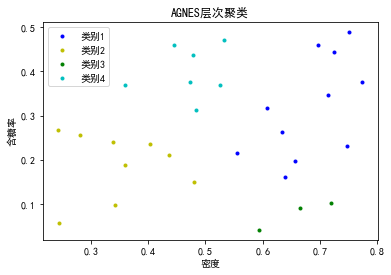

In [9]:
show_now_kmeans(C, k)
plt.title('AGNES层次聚类')
plt.legend()

#### 问：AGNES算法使用最小距离和最大距离的区别？

分析：最小距离要合并的是两个簇边界最短的簇，适合簇内联系区别较大的情况，也就是要分类的类别数量比较大，比如一种样本的数量占大多数。最大距离比较更平均地进行划分。

### 使用scipy方法实现层次聚类

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#### 绘制样本数据的图象

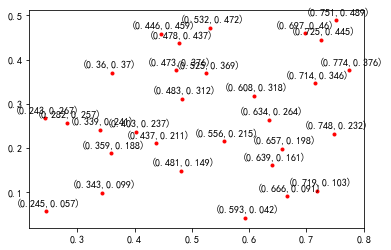

True

In [19]:
def show_2D_data(data):
    plt.figure()
    data_new = np.array(data)
    plt.scatter(data_new[:,0], data_new[:,1], marker = '.', color = 'r')
    for i, point in enumerate(data):#annotate函数为每个点标注坐标
        plt.annotate('(%s,%s)' % (point[0],point[1]), point, xytext = (-30,5), textcoords = 'offset points', color = 'k')
    plt.show()
    return True
show_2D_data(data)

#### 层次聚类

linkage方法用于计算两个聚类簇s和t之间的距离d(s,t)，层次聚类编码为一个linkage矩阵。

In [14]:
Z = linkage(data_new, 'average')
print('聚类过程\n', Z)

聚类过程
 [[0.00000000e+00 2.30000000e+01 3.17647603e-02 2.00000000e+00]
 [2.20000000e+01 2.90000000e+01 3.88329757e-02 2.00000000e+00]
 [2.50000000e+01 2.70000000e+01 4.02616443e-02 2.00000000e+00]
 [1.40000000e+01 2.00000000e+01 4.11460812e-02 2.00000000e+00]
 [1.00000000e+00 1.30000000e+01 4.28018691e-02 2.00000000e+00]
 [1.70000000e+01 2.80000000e+01 5.24690385e-02 2.00000000e+00]
 [9.00000000e+00 1.90000000e+01 5.43415127e-02 2.00000000e+00]
 [5.00000000e+00 3.00000000e+01 5.62010505e-02 3.00000000e+00]
 [1.50000000e+01 2.10000000e+01 5.66480362e-02 2.00000000e+00]
 [1.20000000e+01 1.80000000e+01 5.99332963e-02 2.00000000e+00]
 [6.00000000e+00 1.00000000e+01 6.70820393e-02 2.00000000e+00]
 [1.60000000e+01 3.50000000e+01 6.77895406e-02 3.00000000e+00]
 [1.10000000e+01 3.10000000e+01 7.56638053e-02 3.00000000e+00]
 [3.40000000e+01 3.80000000e+01 7.84475399e-02 4.00000000e+00]
 [3.30000000e+01 3.60000000e+01 9.86647673e-02 4.00000000e+00]
 [7.00000000e+00 2.40000000e+01 9.99049548e-02 2.

#### 根据层级聚类结果linkage矩阵将结果以树状图表示出来

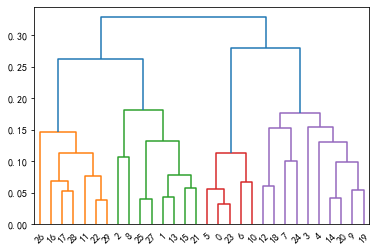

In [15]:
plt.figure()
dn = dendrogram(Z)#dengrogram树状图
plt.show()

#### 从给定linkage链接矩阵定义的层次聚类中形成平面聚类

In [26]:
f = fcluster(Z, 0.2, 'distance')
print('平面聚类结果:\n', f)

平面聚类结果:
 [3 2 2 4 4 3 3 4 2 4 3 1 4 2 4 2 1 1 4 4 4 2 1 3 4 2 1 2 1 1]


#### 结果可视化

Text(0.5, 1.0, 'scipy层次聚类可视化')

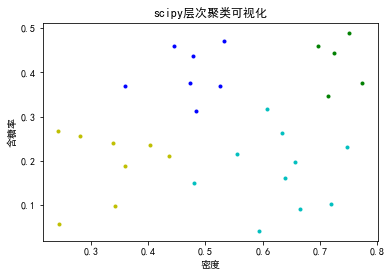

In [28]:
def show_clustered_samples(f):#基于分类后的样本对应标签clustered_indexs向量可视化
    n_clusters = max(f)
    C = []
    for i in range(n_clusters):
        C.append([])
    for i in range(len(f)):
        C[f[i] - 1].append(data_new[i])
    show_now_kmeans(C,n_clusters)
    return True
show_clustered_samples(f)
plt.title('scipy层次聚类可视化')

## 使用sklearn实现层次聚类hierachical clastering

In [18]:
from sklearn.cluster import AgglomerativeClustering

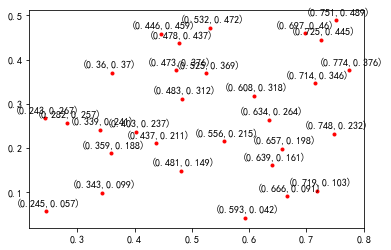

True

In [20]:
show_2D_data(data)

#### 训练模型

In [21]:
ac = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
clustering = ac.fit(data)

In [22]:
clustering

AgglomerativeClustering(linkage='average', n_clusters=3)

In [24]:
print('每个数据所属簇编号', clustering.labels_)
print('每个簇形成过程', clustering.children_)

每个数据所属簇编号 [2 0 0 1 1 2 2 1 0 1 2 0 1 0 1 0 0 0 1 1 1 0 0 2 1 0 0 0 0 0]
每个簇形成过程 [[ 0 23]
 [22 29]
 [25 27]
 [14 20]
 [ 1 13]
 [17 28]
 [ 9 19]
 [ 5 30]
 [15 21]
 [12 18]
 [ 6 10]
 [16 35]
 [11 31]
 [34 38]
 [33 36]
 [ 7 24]
 [ 2  8]
 [41 42]
 [37 40]
 [ 4 44]
 [32 43]
 [26 47]
 [39 45]
 [ 3 49]
 [52 53]
 [46 50]
 [51 55]
 [48 54]
 [56 57]]


簇成员表示簇的形成过程

#### 结果可视化

Text(0.5, 1.0, 'sklearn聚类结果可视化')

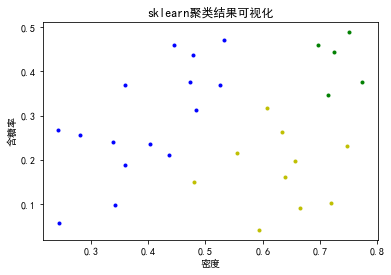

In [30]:
show_clustered_samples(clustering.labels_ + 1)
plt.title('sklearn聚类结果可视化')